In [1]:
#import libraries 
import pandas as pd                #Library used for data manipulation and analysis
import numpy as np                 #libary with high level mathematical functions 
import matplotlib.pyplot as plt    # Library to plot graphs
import seaborn as sns              # built on Matplotlib for visualisation

In [3]:
#read the dataFrame
df = pd.read_csv("Crimes_2001_to_present.csv")

In [4]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068601 entries, 0 to 7068600
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.1+ GB


cleaning


In [4]:
#percent of invalid values
len(df[df.isnull().any(axis=1)])/len(df)*100
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068601 entries, 0 to 7068600
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.1+ GB


In [8]:
def remove_2020_data(df):
    return df[df['Year']<2020]
    
def clean_null_val(df):
    return df.dropna(axis=0)

def change_to_dateTime(df):
    datetimeCol=pd.to_datetime(df['Date'], infer_datetime_format=True)
    return df.assign(Date=datetimeCol)

def get_day_col(df):
    dayCol=pd.DatetimeIndex(df['Date']).day
    return df.assign(Day=dayCol)

def get_month_col(df):
    monthCol=pd.DatetimeIndex(df['Date']).month
    return df.assign(Month=monthCol)

def get_time_col(df):
    timeCol=pd.DatetimeIndex(df['Date']).time
    return df.assign(Time=timeCol)

def drop_unneccessary(df):
    return df.drop(columns=['Updated On','Location','X Coordinate','Y Coordinate','Case Number'])

In [9]:
chicagoCrime=(df.pipe(remove_2020_data)
                .pipe(clean_null_val)
                .pipe(change_to_dateTime)
                .pipe(get_day_col)
                .pipe(get_month_col)
                .pipe(get_time_col)
                .pipe(drop_unneccessary))

chicagoCrime

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Day,Month,Time
60332,11556037,2019-01-03 19:20:00,0000X W RWY 27R,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1654,16.0,41.0,76.0,26,2019,42.002816,-87.906094,3,1,19:20:00
62258,11626027,2019-03-16 17:58:00,001XX N WELLS ST,0460,BATTERY,SIMPLE,STREET,False,False,122,1.0,42.0,32.0,08B,2019,41.883369,-87.633860,16,3,17:58:00
62600,11622422,2019-03-12 22:00:00,008XX E 38TH PL,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,212,2.0,4.0,36.0,06,2019,41.825347,-87.606781,12,3,22:00:00
62633,11625922,2019-03-14 18:42:00,074XX N PAULINA ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,2422,24.0,49.0,1.0,08B,2019,42.016542,-87.672499,14,3,18:42:00
62634,11622907,2019-03-14 16:03:00,008XX E 38TH PL,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,212,2.0,4.0,36.0,26,2019,41.825299,-87.606961,14,3,16:03:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7068593,9999998,2015-03-18 04:00:00,036XX W BELMONT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,False,2523,25.0,35.0,21.0,08B,2015,41.939208,-87.718022,18,3,04:00:00
7068594,9999999,2015-03-18 17:08:00,043XX N CENTRAL AVE,0560,ASSAULT,SIMPLE,RESTAURANT,True,False,1624,16.0,38.0,15.0,08A,2015,41.959944,-87.767226,18,3,17:08:00
7068596,11700926,2019-05-26 17:13:00,036XX W DOUGLAS BLVD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,1011,10.0,24.0,29.0,26,2019,41.862830,-87.717040,26,5,17:13:00
7068597,24560,2019-05-26 06:48:00,013XX W HASTINGS ST,0110,HOMICIDE,FIRST DEGREE MURDER,CHA PARKING LOT,True,False,1233,12.0,25.0,28.0,01A,2019,41.864278,-87.659660,26,5,06:48:00


In [8]:
# preview with all crime variables( primary type)
# for further analysis 

offence = df['Primary Type'].sort_values().unique()
offence, len(offence)

(array(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
        'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
        'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
        'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
        'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
        'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
        'NON - CRIMINAL', 'NON-CRIMINAL',
        'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
        'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
        'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
        'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
        'STALKING', 'THEFT', 'WEAPONS VIOLATION'], dtype=object), 35)

In [49]:
#change the data type to more appropriate format
#change date to python's datatime.datetime format for easy access during extraction

chicagoCrime.Date = pd.to_datetime(chicagoCrime.Date, format='%m / %d / %Y %I: %M: %S %p', errors='ignore')

#set index to the date
chicagoCrime.index= pd.DatetimeIndex(chicagoCrime.Date)

#for grouping
#chicagoCrime['time_hour']= chicagoCrime['Date'].apply(lambda x: x.hour)
#chicagoCrime['month'] = chicagoCrime['Date'].apply(lambda x: x.month)
#chicagoCrime['year'] = chicagoCrime['Date'].apply(lambda x: x.year)

chicagoCrime.head()


C:\Users\Darshini\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Darshini\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Darshini\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,FBI Code,Year,Latitude,Longitude,Day,Month,Time,month,year,time_hour
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03 19:20:00,11556037,2019-01-03 19:20:00,0000X W RWY 27R,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,AIRCRAFT,False,False,1654,...,26,2019,42.002816,-87.906094,3,1,19:20:00,1,2019,19
2019-03-16 17:58:00,11626027,2019-03-16 17:58:00,001XX N WELLS ST,0460,BATTERY,SIMPLE,STREET,False,False,122,...,08B,2019,41.883369,-87.633860,16,3,17:58:00,3,2019,17
2019-03-12 22:00:00,11622422,2019-03-12 22:00:00,008XX E 38TH PL,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,212,...,06,2019,41.825347,-87.606781,12,3,22:00:00,3,2019,22
2019-03-14 18:42:00,11625922,2019-03-14 18:42:00,074XX N PAULINA ST,0460,BATTERY,SIMPLE,RESIDENCE,False,False,2422,...,08B,2019,42.016542,-87.672499,14,3,18:42:00,3,2019,18
2019-03-14 16:03:00,11622907,2019-03-14 16:03:00,008XX E 38TH PL,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,True,212,...,26,2019,41.825299,-87.606961,14,3,16:03:00,3,2019,16


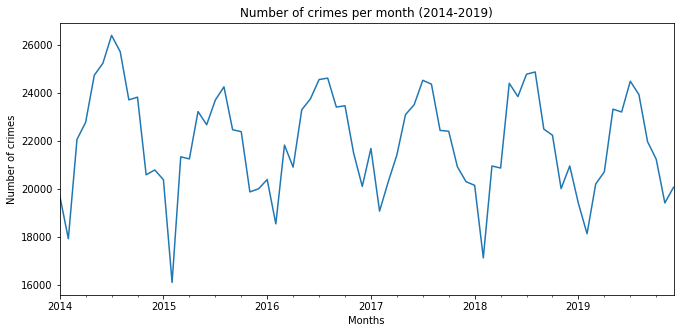

In [11]:
#yearly crime trends

#df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)

chicagoCrime=chicagoCrime[(chicagoCrime['Year']>=2014) & (chicagoCrime['Year']<=2019) ]


plt.figure(figsize=(11,5))
chicagoCrime.resample('M').size().plot(legend = False)
plt.title ('Number of crimes per month (2014-2019)')
plt.xlabel ('Months')
plt.ylabel('Number of crimes')
plt.show()

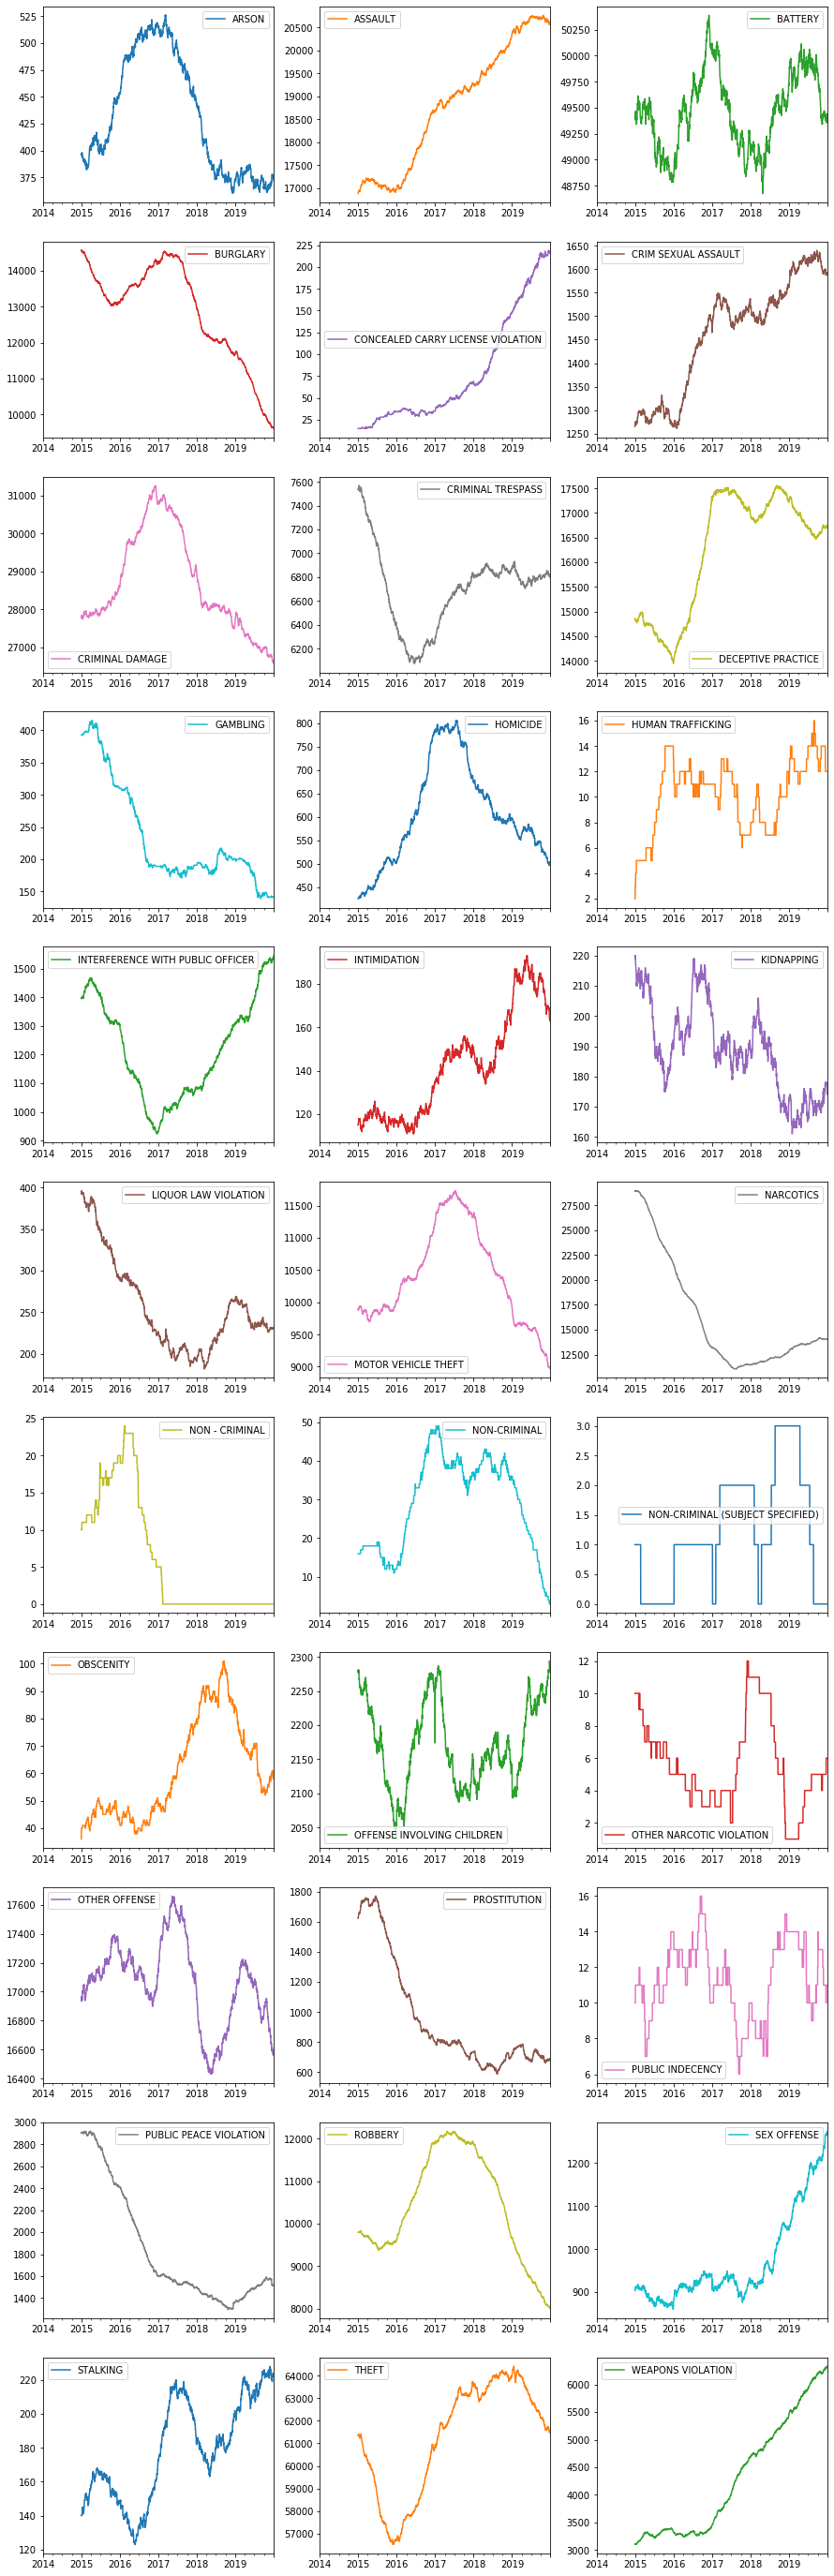

In [12]:
#focus is on each crime
#helps to focus in crime that are up on the rise

crimes_count = chicagoCrime.pivot_table('ID', aggfunc=np.size, columns='Primary Type',
                             index=chicagoCrime.index.date, fill_value=0)
crimes_count.index = pd.DatetimeIndex(crimes_count.index)
plot = crimes_count.rolling(365).sum().plot(figsize=(15 ,50), subplots = True,
                                           layout=(-1,3), sharex= False, sharey= False)

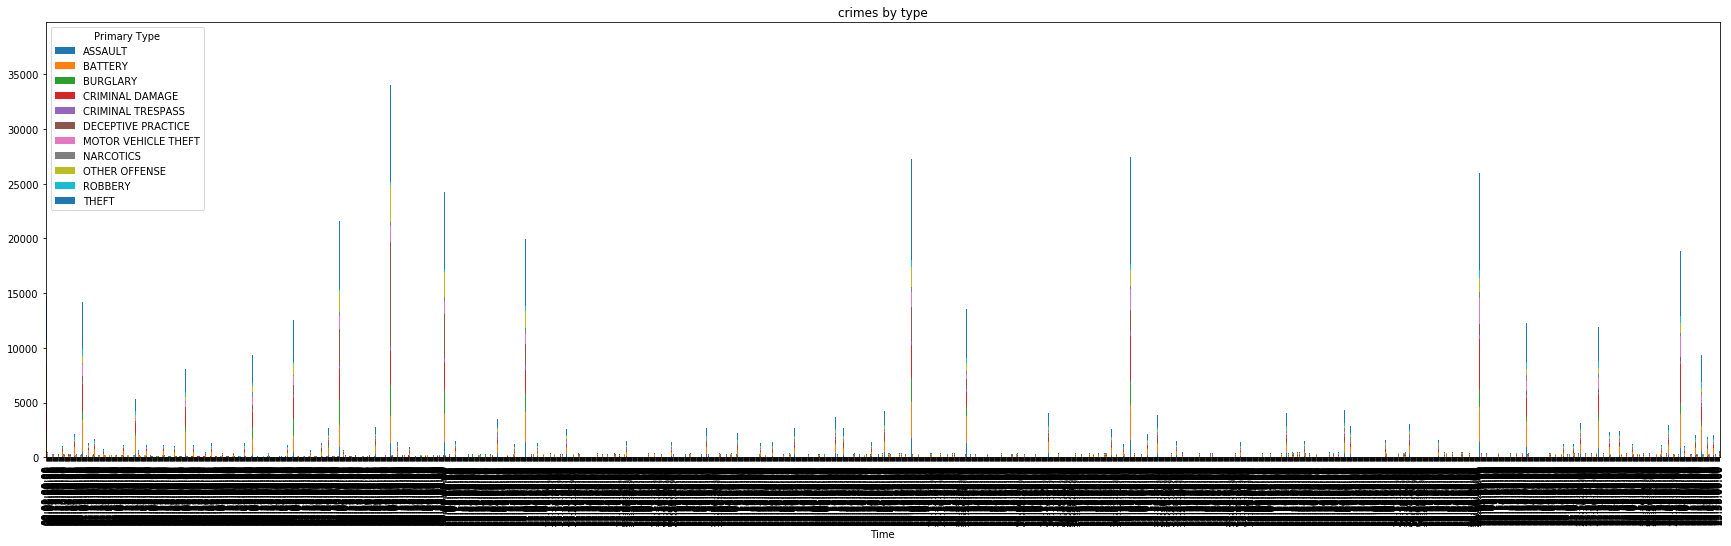

In [44]:
#hourly crime freq filtering by crime types
primary_types = ['THEFT','BATTERY','CRIMINAL DAMAGE', 'ASSAULT','NARCOTICS',
                'OTHER OFFENSE', 'DECEPTIVE PRACTICE','BURGLARY','MOTOR VEHICLE THEFT',
                'ROBBERY','CRIMINAL TRESPASS']
crime_type = chicagoCrime.copy() # all these just for grouping 
crime_type = crime_type[crime_type['Primary Type'].isin(primary_types)]
crime_type = crime_type.groupby(['Time','Primary Type']).size().reset_index(name='crimes by type')

#now format the hour data at x axis

crime_type['Time'] = crime_type['Time'].apply(lambda x: str(x)+':00')

#pivot table
crime_type_piv= pd.pivot_table(crime_type, index=['Time'], columns=['Primary Type'],
                              values='crimes by type', aggfunc=np.sum)

#bar chart
crime_type_piv.plot(kind='bar', stacked=True, figsize=(30,8), title="crimes by type")
plt.show()

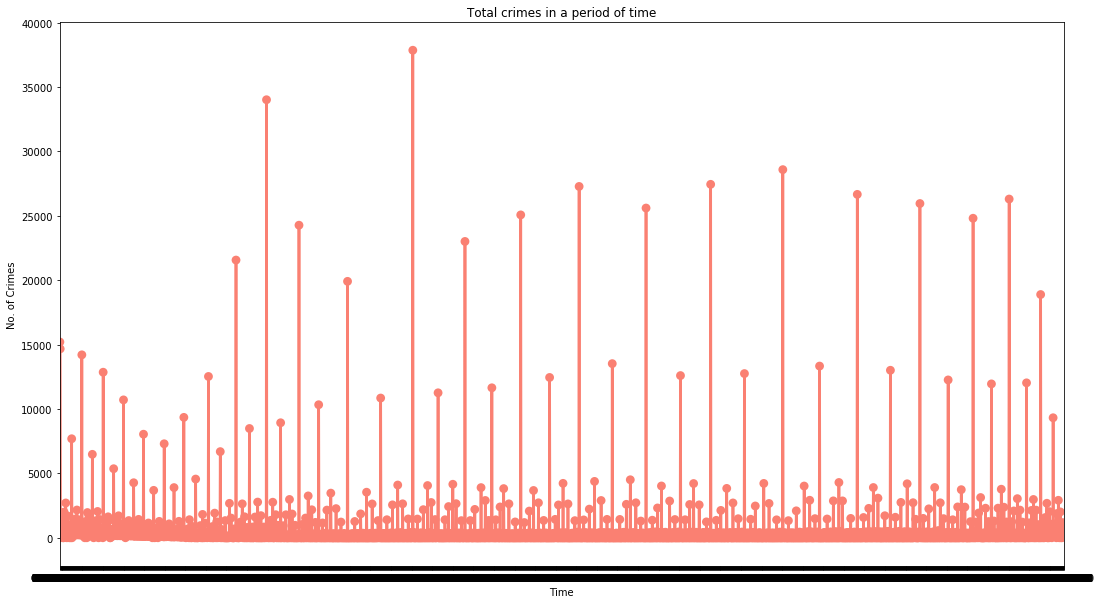

In [46]:
crime_time = chicagoCrime.copy()

crime_time= crime_time[crime_time['Primary Type'].isin(primary_types)]

crime_time= crime_time.groupby('Time').size().reset_index(name='No. of Crimes')
crime_time['hours']= crime_time['Time'].apply(lambda x : str(x)+':00')

fig=plt.figure(figsize=(18,10))
sns.pointplot(data=crime_time, x="hours" , y="No. of Crimes", color="salmon")

plt.xlabel('Time')
plt.ylabel('No. of Crimes')
plt.title('Total crimes in a period of time')
plt.show()